[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Chargement des données d'entraînement...
Chargement des données de test...
Forme des données d'entraînement: (25000, 2)
Forme des données de test: (25000, 2)
Nettoyage des données textuelles...
Extraction de caractéristiques avec TF-IDF...
Entraînement du modèle de régression logistique...

Recherche des critiques mitigées...

Nombre de critiques mitigées trouvées: 3593

Exemples de critiques mitigées :

--- Critique mitigée #1 ---
Proportion positive: 0.70, Proportion négative: 0.30
Phrases positives: 7, Phrases négatives: 3

Phrases et leurs sentiments :
Phrase 1 (neutre, prob_pos=0.61): A recent survey of children in the UK re-enforced the notion put forth by this film 27 years ago.
Phrase 2 (neutre, prob_pos=0.32): That being more than anything else, young people want to grow up to be somebody famous.
Phrase 3 (négatif, prob_pos=0.24): It used to be doctors and firemen that kids wanted to be.
Phrase 4 (positif, prob_pos=0.75): Now, everyone wants to be famous.
Phrase 5 (neutre, pro

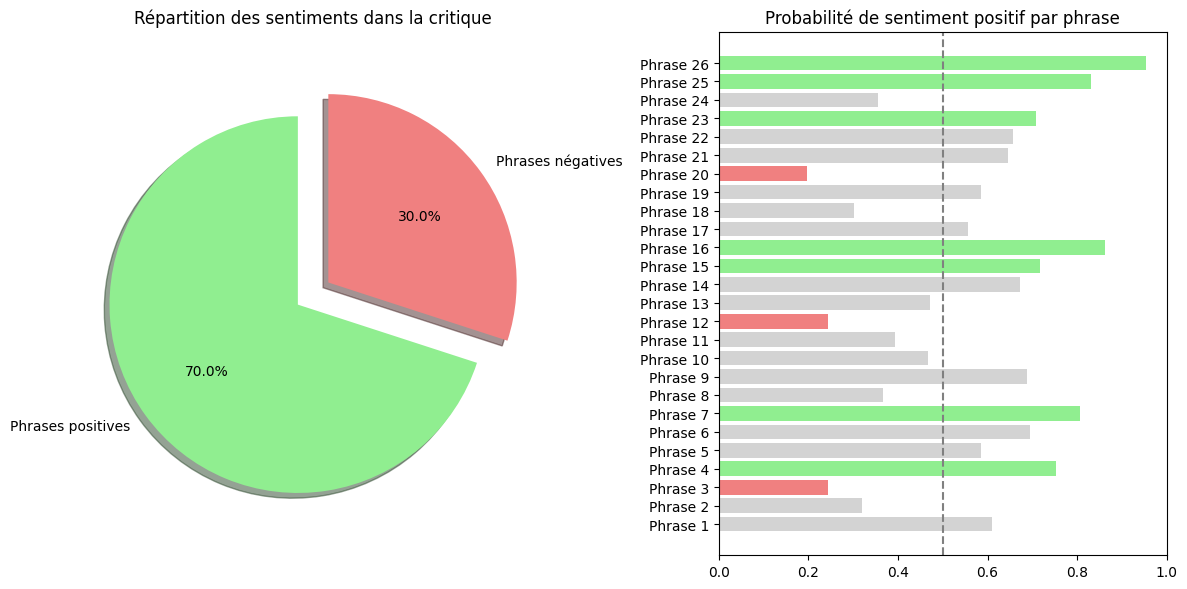


Critique complète:
A recent survey of children in the UK re-enforced the notion put forth by this film 27 years ago. That being more than anything else, young people want to grow up to be somebody famous. It used to be doctors and firemen that kids wanted to be. Now, everyone wants to be famous. Fame is a story of a group of kids accepted into the High School for Performing Arts in New York City. We seen them first audition, then take classes and learn about life for the next four years. The film has a lot of fine qualities, but ultimately leaves you feeling a little unsatisfied.<br /><br />Alan Parker's bold directorial style fits the story pretty well. The film has been classified as a musical, but more than anything it is a drama. Musical numbers and dance routines break out here and there, and Parker keeps them as close to realistic as they really could have been filmed. The acting is for the most part top-drawer with a few exceptions. The pacing is a little off, particularly towa

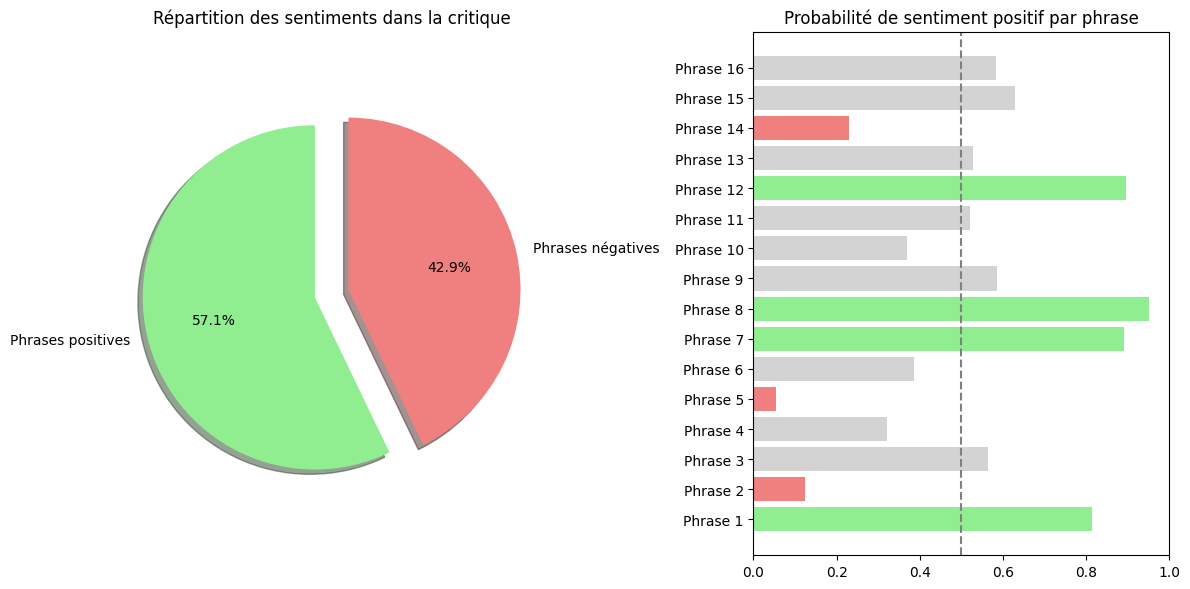


--- Critique mitigée #3 ---
Proportion positive: 0.43, Proportion négative: 0.57
Phrases positives: 3, Phrases négatives: 4

Phrases et leurs sentiments :
Phrase 1 (négatif, prob_pos=0.22): I didn't know anything about this movie before I watched it.
Phrase 2 (négatif, prob_pos=0.26): It seems to be a lesser-known teen horror from the 80's.
Phrase 3 (positif, prob_pos=0.85): What struck me were the ways it differed from so many other movies from that era.<br /><br />The fir...
Phrase 4 (neutre, prob_pos=0.42): It doesn't do the typical setup of showing characters being murdered one by one.
Phrase 5 (positif, prob_pos=0.80): It takes its time building the back story, leaving a little bit of mystery about what might happen.
Phrase 6 (négatif, prob_pos=0.27): I was almost starting to think no one would even really get hurt in this movie.
Phrase 7 (négatif, prob_pos=0.23): But everything leads to the climatic sequence during the last 15 minutes, and then it gets fairly gr...
Phrase 8 (neu

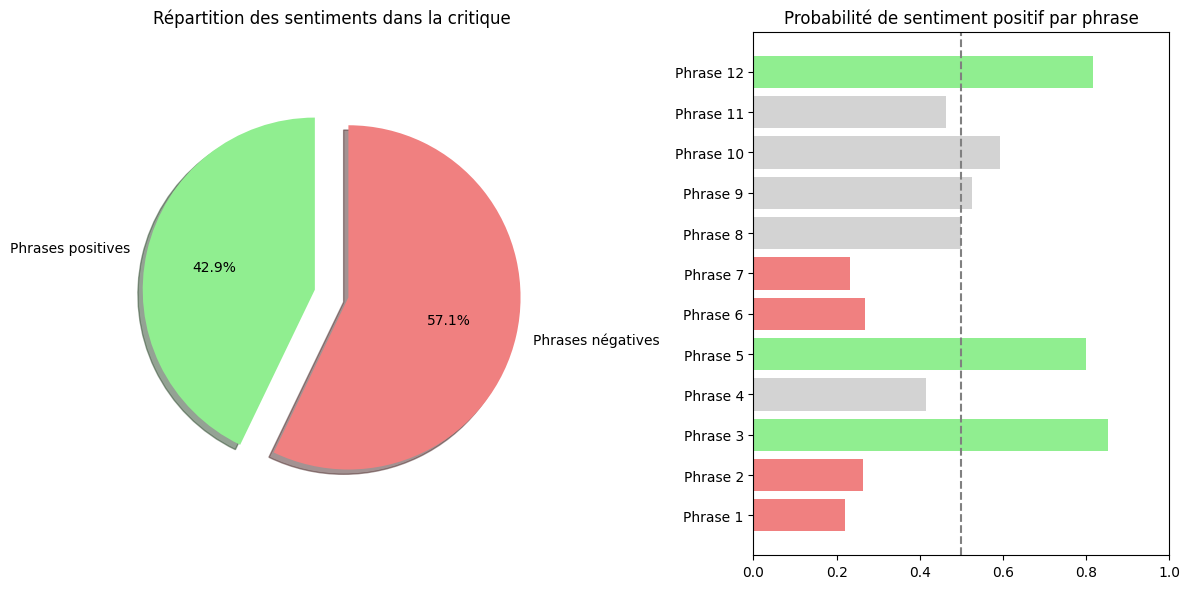


--- Critique mitigée #4 ---
Proportion positive: 0.67, Proportion négative: 0.33
Phrases positives: 6, Phrases négatives: 3

Phrases et leurs sentiments :
Phrase 1 (positif, prob_pos=0.83): One year after 'Love Thy Neighbour' made its I.T.V.
Phrase 2 (neutre, prob_pos=0.53): debut, it followed the route taken by 'On The Buses' and 'Steptoe & Son' by graduating onto the big ...
Phrase 3 (neutre, prob_pos=0.63): It opens with a stirring patriotic speech lauding the virtues of England's green and pleasant land, ...
Phrase 4 (neutre, prob_pos=0.61): This escalates into a strange sequence of white and black neighbours vandalising their each other's ...
Phrase 5 (négatif, prob_pos=0.28): At least the original theme tune is retained ( even if it is sung by someone other than Stuart Gilli...
Phrase 6 (neutre, prob_pos=0.63): Barbie suggests to Joan that they should enter.
Phrase 7 (neutre, prob_pos=0.40): The thing is, can Bill and Eddie stay friends long enough to win it?
Phrase 8 (négatif, 

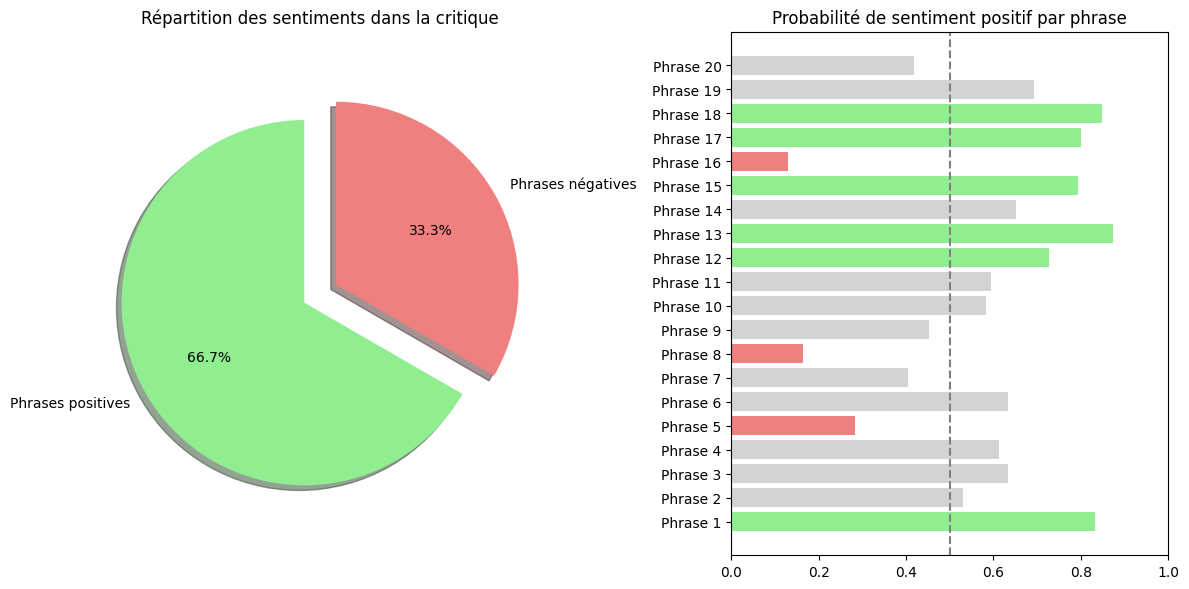


--- Critique mitigée #5 ---
Proportion positive: 0.62, Proportion négative: 0.38
Phrases positives: 5, Phrases négatives: 3

Phrases et leurs sentiments :
Phrase 1 (neutre, prob_pos=0.64): I just re-watched a few episodes of this series on very poor VHS tapes that I recorded the series on...
Phrase 2 (positif, prob_pos=0.71): I'm glad I did, though.<br /><br />Ramona is based on the children's books by Beverly Cleary and fol...
Phrase 3 (positif, prob_pos=0.74): She has fun with friends and family and gets into trouble much like many eight-year-olds.
Phrase 4 (positif, prob_pos=0.76): All ten episodes are pretty good.
Phrase 5 (neutre, prob_pos=0.42): "Mystery Meal" kind of grosses me out as a vegan, but it's funny seeing the parents trying to get th...
Phrase 6 (négatif, prob_pos=0.16): And any episode that mentions Godzilla Versus The Smog Monster twice can't be all bad.
Phrase 7 (négatif, prob_pos=0.02): I like "Ramona's Bad Day" even more.
Phrase 8 (positif, prob_pos=0.83): Althou

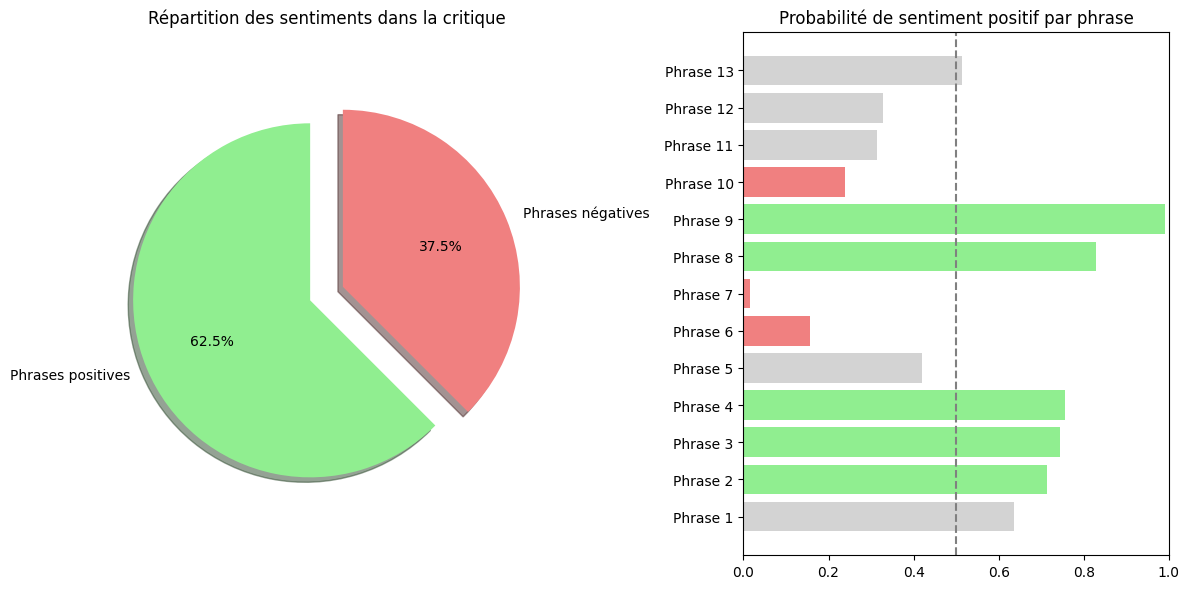


Les critiques mitigées ont été sauvegardées dans 'mixed_reviews.csv'


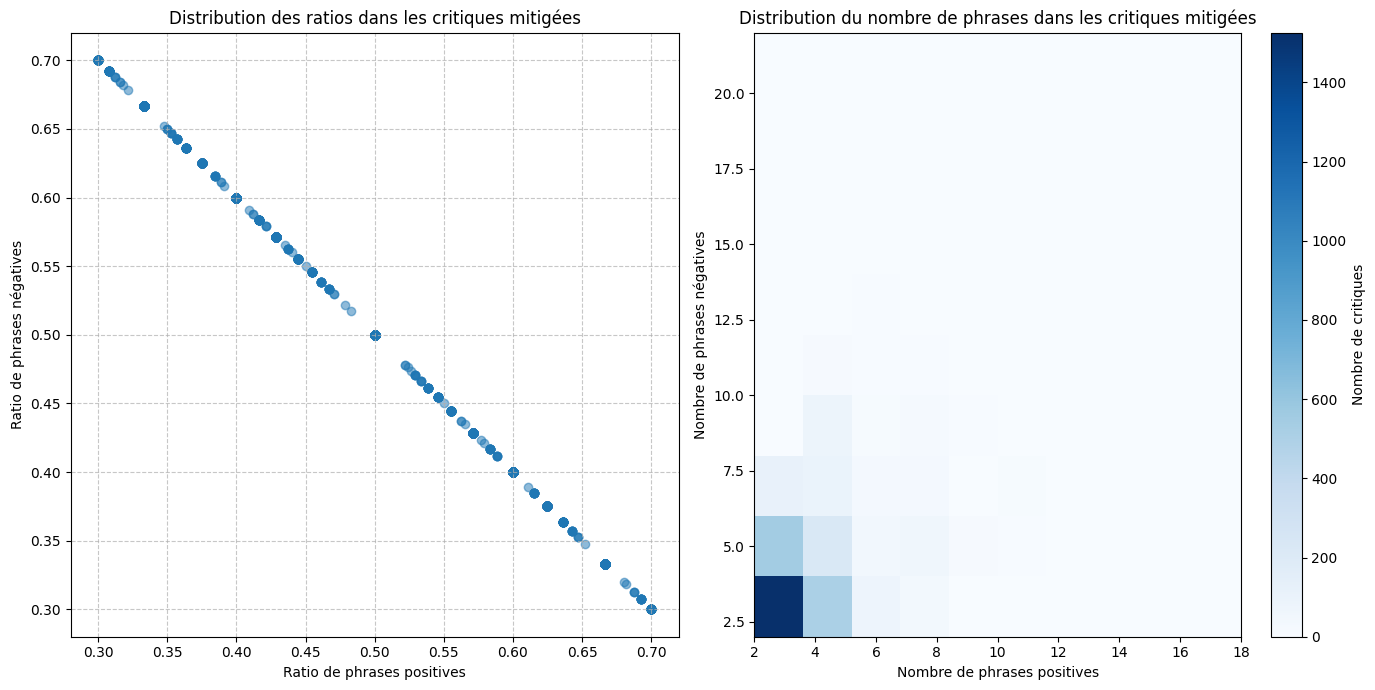

In [4]:
import os
import re
import tarfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

# Télécharger les ressources NLTK nécessaires
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def extract_dataset(tar_path, extract_path='.'):
    """Extraire le dataset IMDb du fichier tar.gz."""
    print(f"Extraction de {tar_path} vers {extract_path}...")
    with tarfile.open(tar_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)
    print("Extraction terminée!")

def clean_text(text):
    """Nettoyer et prétraiter les données textuelles."""
    # Supprimer les balises HTML
    text = re.sub(r'<.*?>', '', text)
    # Supprimer les caractères non alphabétiques
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Convertir en minuscules et diviser
    words = text.lower().split()
    # Supprimer les mots vides
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def load_dataset(dataset_path):
    """Charger le dataset IMDb dans un DataFrame pandas."""
    reviews = []
    labels = []

    # Charger les critiques positives
    pos_path = os.path.join(dataset_path, 'pos')
    for filename in os.listdir(pos_path):
        if filename.endswith('.txt'):
            with open(os.path.join(pos_path, filename), 'r', encoding='utf-8') as f:
                reviews.append(f.read())
                labels.append(1)  # Étiquette positive

    # Charger les critiques négatives
    neg_path = os.path.join(dataset_path, 'neg')
    for filename in os.listdir(neg_path):
        if filename.endswith('.txt'):
            with open(os.path.join(neg_path, filename), 'r', encoding='utf-8') as f:
                reviews.append(f.read())
                labels.append(0)  # Étiquette négative

    return pd.DataFrame({'review': reviews, 'sentiment': labels})

def train_sentiment_model(train_df):
    """Entraîner un modèle de classification de sentiment."""
    print("Nettoyage des données textuelles...")
    train_df['cleaned_review'] = train_df['review'].apply(clean_text)

    # Extraction de caractéristiques avec TF-IDF
    print("Extraction de caractéristiques avec TF-IDF...")
    vectorizer = TfidfVectorizer(max_features=10000, min_df=5, max_df=0.8)
    X_train = vectorizer.fit_transform(train_df['cleaned_review'])
    y_train = train_df['sentiment']

    # Entraîner le classifieur
    print("Entraînement du modèle de régression logistique...")
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier.fit(X_train, y_train)

    return vectorizer, classifier

def find_mixed_reviews(reviews_df, vectorizer, classifier, threshold=0.3):
    """
    Identifier les critiques mitigées en analysant le sentiment au niveau des phrases.
    Une critique est considérée comme mitigée si elle contient à la fois des phrases
    positives et négatives avec une certaine proportion.
    """
    mixed_reviews = []
    mixed_reviews_details = []

    for idx, review in enumerate(reviews_df['review']):
        # Diviser la critique en phrases
        sentences = sent_tokenize(review)

        if len(sentences) <= 1:
            continue

        # Analyser le sentiment de chaque phrase
        pos_count = 0
        neg_count = 0
        sentence_sentiments = []

        for sentence in sentences:
            # Nettoyer la phrase
            cleaned_sentence = clean_text(sentence)
            if not cleaned_sentence:  # Ignorer les phrases vides après nettoyage
                continue

            # Vectoriser et prédire
            vec_sentence = vectorizer.transform([cleaned_sentence])
            prediction = classifier.predict_proba(vec_sentence)[0]
            prob_positive = prediction[1]

            # Déterminer le sentiment avec un seuil de confiance
            if prob_positive >= 0.7:
                pos_count += 1
                sentiment = "positif"
            elif prob_positive <= 0.3:
                neg_count += 1
                sentiment = "négatif"
            else:
                sentiment = "neutre"

            sentence_sentiments.append((sentence, sentiment, prob_positive))

        # Calculer les proportions
        total_valid_sentences = pos_count + neg_count
        if total_valid_sentences > 0:
            pos_ratio = pos_count / total_valid_sentences
            neg_ratio = neg_count / total_valid_sentences

            # Une critique est mitigée si elle contient une proportion significative
            # à la fois de phrases positives et négatives
            if (pos_ratio >= threshold and neg_ratio >= threshold and
                pos_count >= 2 and neg_count >= 2):
                mixed_reviews.append(idx)
                mixed_reviews_details.append({
                    'review': review,
                    'pos_count': pos_count,
                    'neg_count': neg_count,
                    'pos_ratio': pos_ratio,
                    'neg_ratio': neg_ratio,
                    'sentences': sentence_sentiments
                })

    return mixed_reviews, mixed_reviews_details

def visualize_mixed_review(review_detail):
    """Visualiser la composition d'une critique mitigée."""
    # Créer un diagramme en secteurs pour la proportion de phrases positives vs négatives
    labels = ['Phrases positives', 'Phrases négatives']
    sizes = [review_detail['pos_count'], review_detail['neg_count']]
    colors = ['lightgreen', 'lightcoral']
    explode = (0.1, 0.1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Répartition des sentiments dans la critique')

    # Afficher les probabilités de sentiment pour chaque phrase
    plt.subplot(1, 2, 2)
    sentences = [f"Phrase {i+1}" for i in range(len(review_detail['sentences']))]
    probabilities = [sent[2] for sent in review_detail['sentences']]
    sentiments = [sent[1] for sent in review_detail['sentences']]

    colors = ['lightcoral' if s == "négatif" else 'lightgreen' if s == "positif" else 'lightgray'
              for s in sentiments]

    plt.barh(sentences, probabilities, color=colors)
    plt.axvline(x=0.5, color='gray', linestyle='--')
    plt.title('Probabilité de sentiment positif par phrase')
    plt.xlim(0, 1)

    plt.tight_layout()
    plt.show()

def main():
    tar_path = 'aclImdb_v1.tar.gz'
    extract_path = '.'

    # Extraire le dataset si nécessaire
    if not os.path.exists(os.path.join(extract_path, 'aclImdb')):
        extract_dataset(tar_path, extract_path)

    # Définir les chemins
    train_path = os.path.join(extract_path, 'aclImdb', 'train')
    test_path = os.path.join(extract_path, 'aclImdb', 'test')

    print("Chargement des données d'entraînement...")
    train_df = load_dataset(train_path)
    print("Chargement des données de test...")
    test_df = load_dataset(test_path)

    print(f"Forme des données d'entraînement: {train_df.shape}")
    print(f"Forme des données de test: {test_df.shape}")

    # Entraîner le modèle de sentiment
    vectorizer, classifier = train_sentiment_model(train_df)

    # Trouver les critiques mitigées
    print("\nRecherche des critiques mitigées...")
    mixed_indices, mixed_details = find_mixed_reviews(test_df, vectorizer, classifier)

    print(f"\nNombre de critiques mitigées trouvées: {len(mixed_indices)}")

    # Afficher quelques exemples de critiques mitigées
    if mixed_details:
        print("\nExemples de critiques mitigées :")
        for i, review_detail in enumerate(mixed_details[:5]):  # Afficher les 5 premiers exemples
            print(f"\n--- Critique mitigée #{i+1} ---")
            print(f"Proportion positive: {review_detail['pos_ratio']:.2f}, Proportion négative: {review_detail['neg_ratio']:.2f}")
            print(f"Phrases positives: {review_detail['pos_count']}, Phrases négatives: {review_detail['neg_count']}")
            print("\nPhrases et leurs sentiments :")

            # Afficher les phrases avec leurs sentiments
            for j, (sentence, sentiment, prob) in enumerate(review_detail['sentences']):
                if len(sentence) > 100:  # Tronquer les phrases trop longues
                    sentence = sentence[:100] + "..."
                print(f"Phrase {j+1} ({sentiment}, prob_pos={prob:.2f}): {sentence}")

            # Visualiser la répartition des sentiments
            visualize_mixed_review(review_detail)

            # Afficher la critique complète pour le premier exemple seulement
            if i == 0:
                print("\nCritique complète:")
                print(review_detail['review'])

    # Créer un DataFrame avec toutes les critiques mitigées
    mixed_reviews_df = pd.DataFrame({
        'index': mixed_indices,
        'review': [details['review'] for details in mixed_details],
        'pos_count': [details['pos_count'] for details in mixed_details],
        'neg_count': [details['neg_count'] for details in mixed_details],
        'pos_ratio': [details['pos_ratio'] for details in mixed_details],
        'neg_ratio': [details['neg_ratio'] for details in mixed_details]
    })

    # Sauvegarder les résultats
    mixed_reviews_df.to_csv('mixed_reviews.csv', index=False)
    print("\nLes critiques mitigées ont été sauvegardées dans 'mixed_reviews.csv'")

    # Analyse des critiques mitigées
    if not mixed_reviews_df.empty:
        plt.figure(figsize=(14, 7))

        # Distribution des ratios positifs/négatifs
        plt.subplot(1, 2, 1)
        plt.scatter(mixed_reviews_df['pos_ratio'], mixed_reviews_df['neg_ratio'], alpha=0.5)
        plt.xlabel('Ratio de phrases positives')
        plt.ylabel('Ratio de phrases négatives')
        plt.title('Distribution des ratios dans les critiques mitigées')
        plt.grid(True, linestyle='--', alpha=0.7)

        # Distribution du nombre de phrases positives vs négatives
        plt.subplot(1, 2, 2)
        plt.hist2d(mixed_reviews_df['pos_count'], mixed_reviews_df['neg_count'],
                 bins=10, cmap='Blues')
        plt.colorbar(label='Nombre de critiques')
        plt.xlabel('Nombre de phrases positives')
        plt.ylabel('Nombre de phrases négatives')
        plt.title('Distribution du nombre de phrases dans les critiques mitigées')

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()

In [3]:
# Télécharger les ressources NLTK nécessaires
nltk.download('stopwords')
nltk.download('punkt')
# Download punkt_tab as well
nltk.download('punkt_tab') # Download the punkt_tab data
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
